## Import data

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Download latest version
path = kagglehub.dataset_download("raghadalharbi/all-products-available-on-sephora-website")
files = os.listdir(path)
print("Path to dataset files:", path)
print("Files in dataset directory:", files)


Path to dataset files: /root/.cache/kagglehub/datasets/raghadalharbi/all-products-available-on-sephora-website/versions/1
Files in dataset directory: ['sephora_website_dataset.csv']


In [ ]:
csv_file_path = os.path.join(path, "sephora_website_dataset.csv")
data = pd.read_csv(csv_file_path)

## Data Exploration

***Column Descriptions***
- **id**: Unique identifier for each product.
- **brand**: Brand name of the product.
- **category**: Product category, e.g., skincare, fragrance.
- **name**: Name of the product.
- **size**: Product size information.
- **rating**: Customer rating of the product (scale 0–5).
- **number_of_reviews**: Number of customer reviews.
- **love**: "Love" metric, indicating user engagement.
- **price**: Product price in USD.
- **value_price**: Listed value price, if different from sale price.
- **MarketingFlags**: Boolean flag for marketing purposes.
- **MarketingFlags_content**: Additional marketing information.
- **options**: Available product options, such as colors or sizes.
- **details**: Detailed product description.
- **how_to_use**: Instructions for using the product.
- **ingredients**: List of ingredients for applicable products.
- **online_only**: Indicator if the product is only available online.
- **exclusive**: Indicator if the product is exclusive to Sephora.
- **limited_edition**: Flag for limited-edition items.
- **limited_time_offer**: Flag for limited-time offers.


In [ ]:
data.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [ ]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64


***Missing Data Summary***

The dataset has no missing values in any column, as confirmed by the analysis.


In [ ]:
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
count_name = len(pd.unique(data['name']))
print("Unique Products:", count_name)

count_category = len(pd.unique(data['category']))
print("Unique Categories:", count_category)

count_brand = len(pd.unique(data['brand']))
print("Unique Brands:", count_brand)

Unique Products: 9106
Unique Categories: 143
Unique Brands: 324


In [ ]:
# Selecting numerical columns for standardization
numerical_features = ['price','number_of_reviews', 'love']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

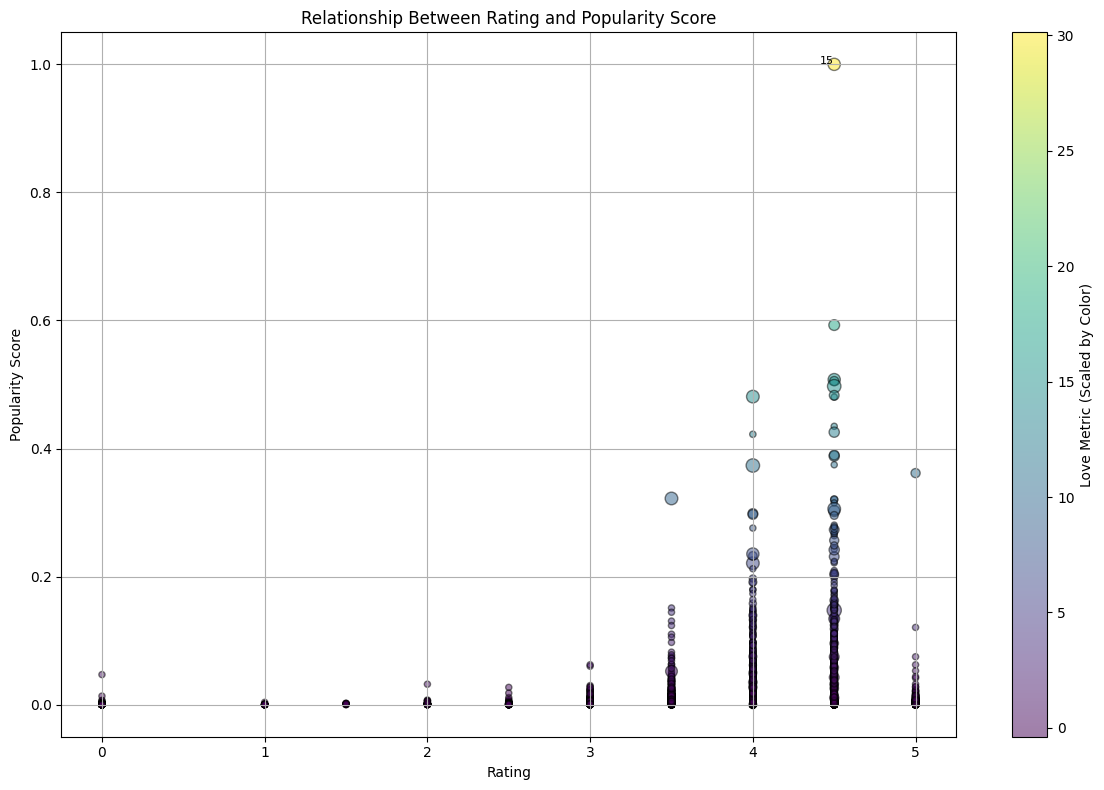

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Extract relevant columns
rating = data['rating']
love = data['love']
reviews = data['number_of_reviews']

# Ensure no NaN or invalid values in 'reviews'
reviews = reviews.fillna(0)  # Replace NaN with 0
reviews = np.maximum(reviews, 1)  # Replace negatives or 0 with a minimum size of 1

# Calculate popularity score (scaled love metric)
scaler = MinMaxScaler()
popularity_score = scaler.fit_transform(love.values.reshape(-1, 1)).flatten()

# Create a scatter plot to visualize rating vs. popularity score
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rating,
    popularity_score,
    c=love,
    s=[max(20, r * 5) for r in reviews],  # Adjusted size scaling
    cmap='viridis',
    alpha=0.5,  # Increase transparency
    edgecolor='k'
)
plt.colorbar(scatter, label='Love Metric (Scaled by Color)')
plt.xlabel('Rating')
plt.ylabel('Popularity Score')
plt.title('Relationship Between Rating and Popularity Score')
plt.grid(True)

# Add annotations only for points with high popularity scores
for i, txt in enumerate(reviews):
    if popularity_score[i] > 0.8:  # Annotate products with high popularity scores
        plt.annotate(
            int(txt),  # Display the review count as integer
            (rating.iloc[i], popularity_score[i]),
            fontsize=8,
            ha='right'
        )

plt.tight_layout()
plt.show()





### Target Variable Analysis: Rating
- Ratings are mostly positive, centered around higher values (e.g., 4 and above), indicating high customer satisfaction.
- Few low ratings suggest potential issues in specific product categories.

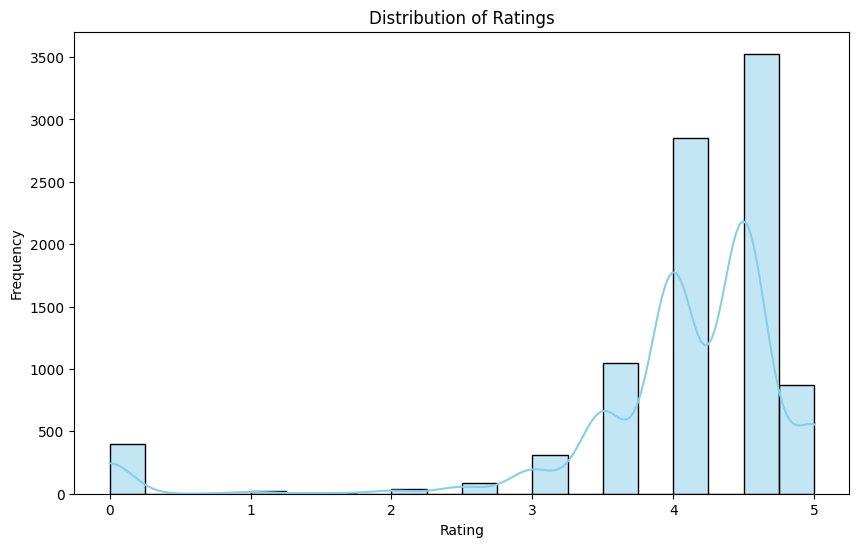

In [ ]:
# Analyze target variable (e.g., `rating`)
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Explanation
print("Ratings Summary:")
print(data['rating'].describe())

Ratings Summary:
count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64


## Plot the Data and Visualization

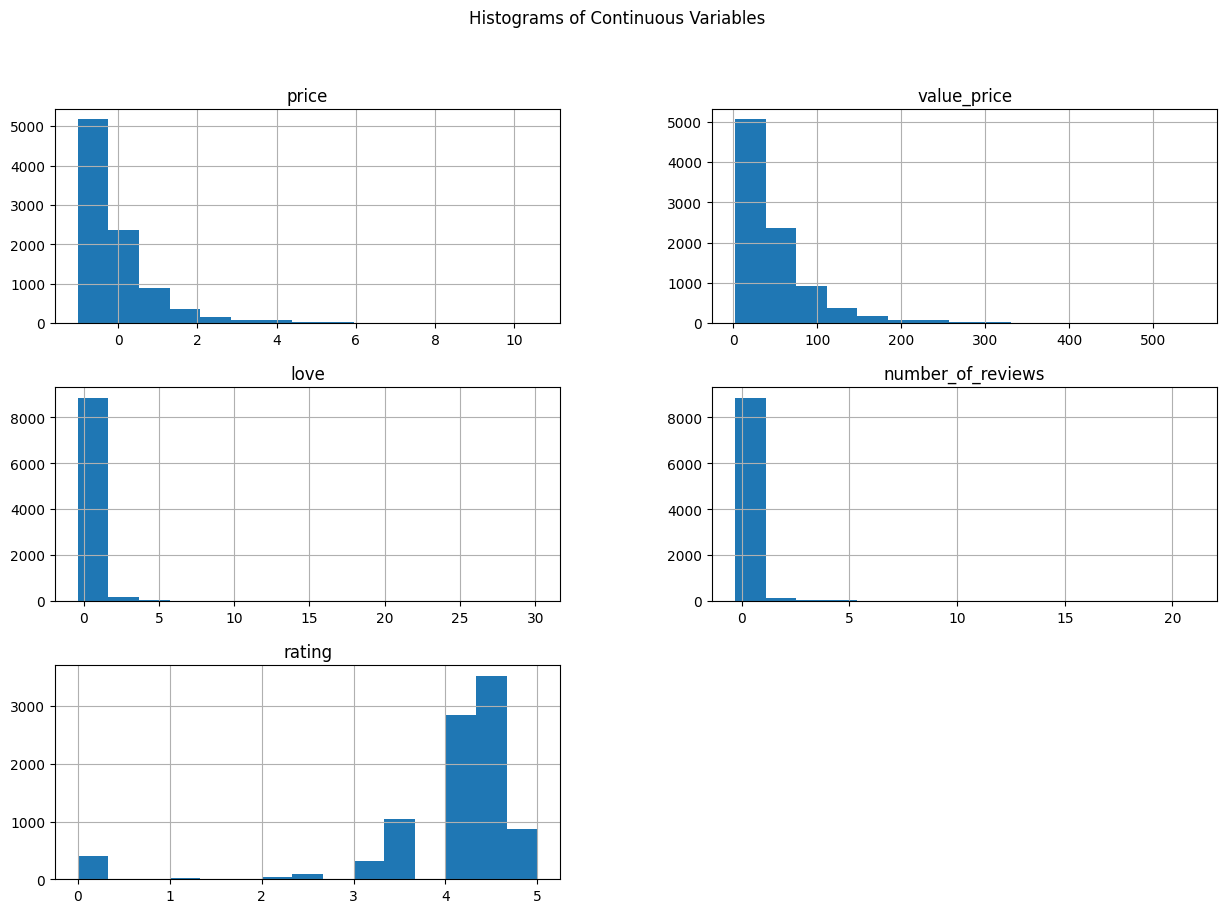

In [ ]:
# Histograms for continuous variables
numeric_columns = ['price', 'value_price', 'love', 'number_of_reviews', 'rating']
data[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

* Price: Most products have a price near zero, with very few high-priced items, indicating a heavily right-skewed distribution.
* Value Price: Similar to the price distribution, with a long right tail suggesting that a small number of items are much more expensive.
* Love: The distribution is heavily concentrated near the lower end, with most products having very low engagement (love count).
* Number of Reviews: The majority of products have few reviews, with the count sharply decreasing as the number of reviews increases.
* Rating: Ratings are concentrated around higher values, indicating that most products are well-rated.

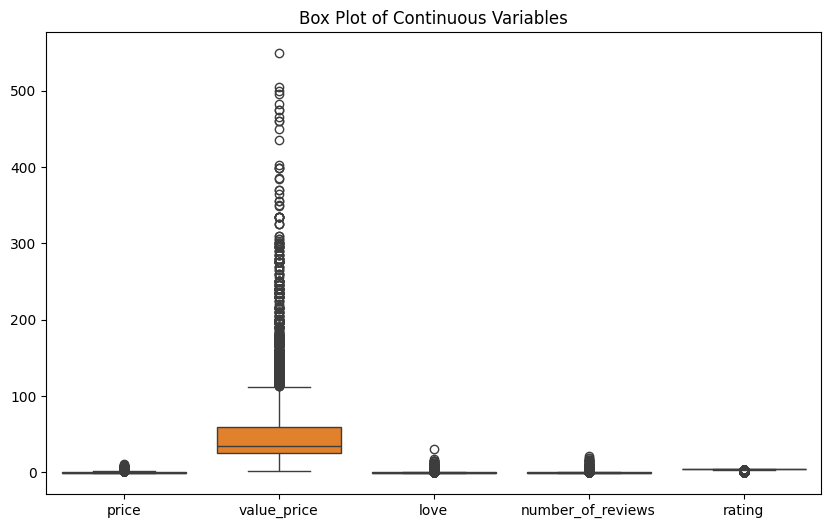

In [ ]:
# Box plots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Box Plot of Continuous Variables')
plt.show()


* Price & Value Price: There are significant outliers, especially in value_price, indicating that some products are exceptionally expensive compared to the majority.
* Love: A few products have significantly higher love counts, marking them as outliers.
* Number of Reviews: Most values are clustered near zero, with some extreme outliers suggesting a few products receive a disproportionately high number of reviews.
* Rating: Ratings have a relatively narrow range, with a few outliers.

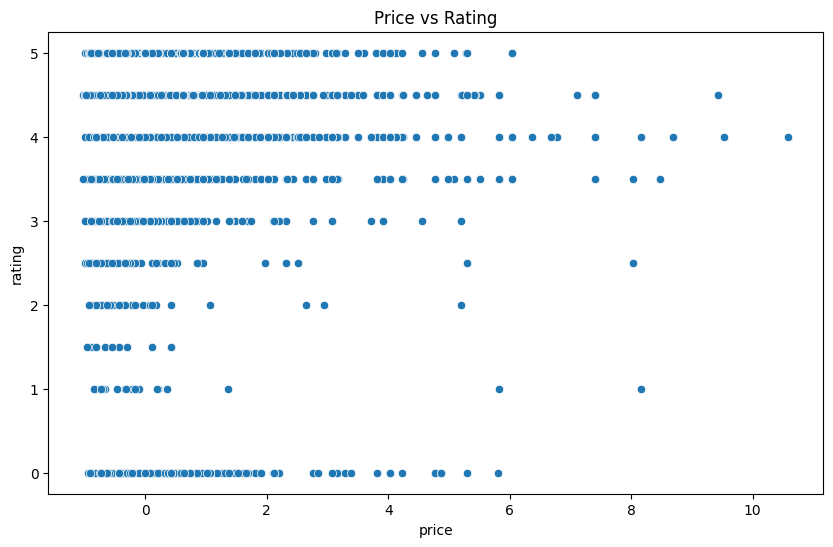

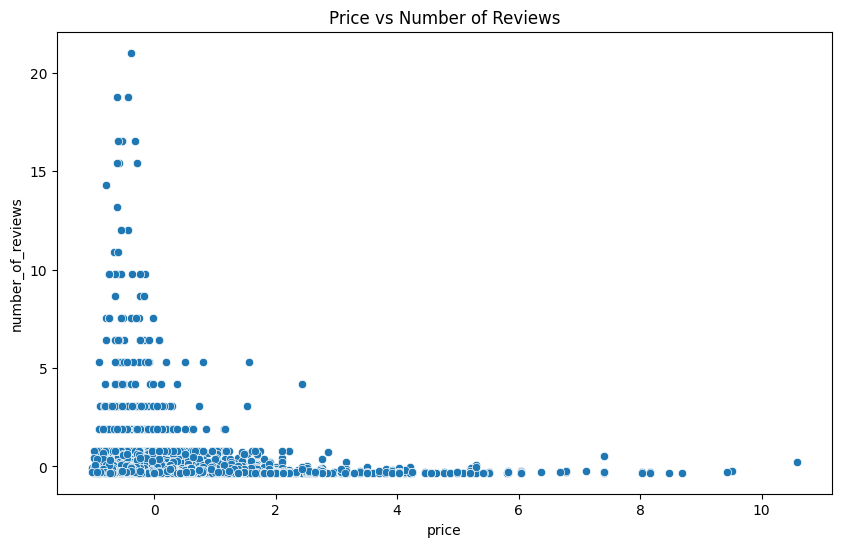

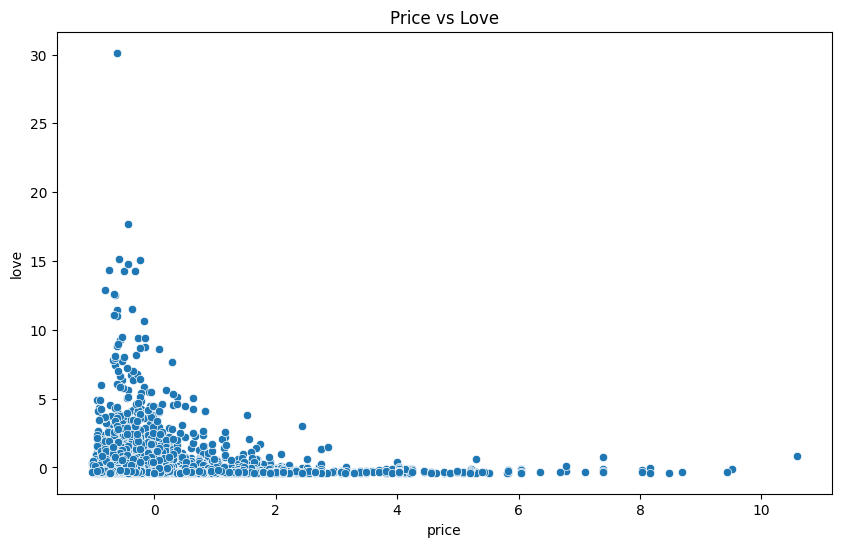

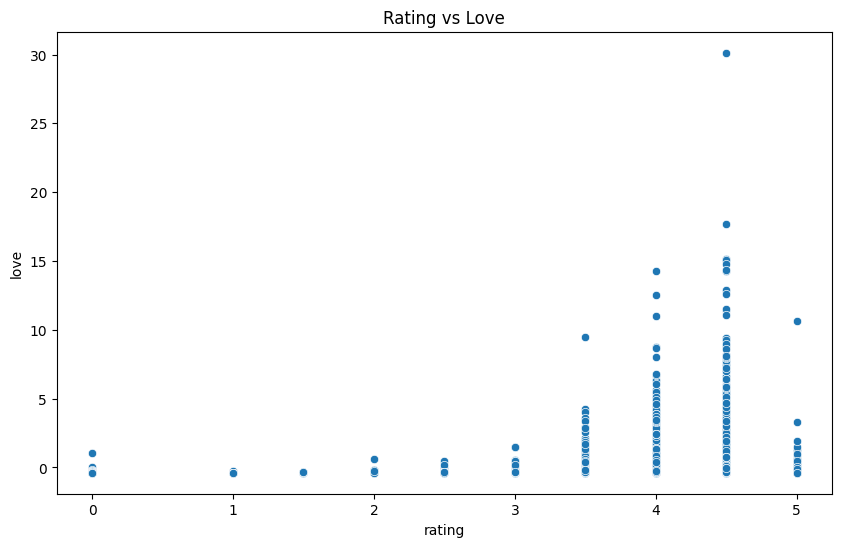

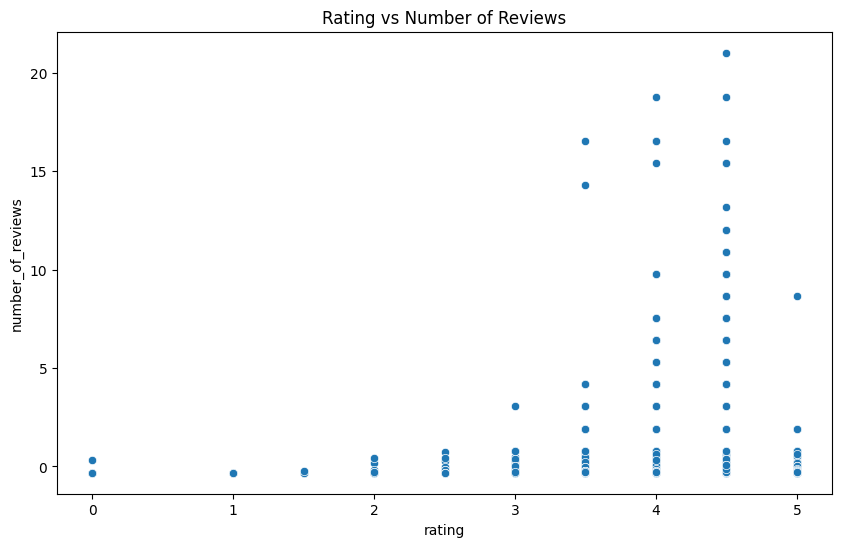

In [ ]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=data)
plt.title('Price vs Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Price vs Number of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='love', data=data)
plt.title('Price vs Love')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='love', data=data)
plt.title('Rating vs Love')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='number_of_reviews', data=data)
plt.title('Rating vs Number of Reviews')
plt.show()

Observation:
1. Most products with low prices have fewer reviews, but there are a few expensive products with a high number of reviews. There is no obvious linear relationship.

2. Products with lower prices tend to have low love counts. However, some expensive products still receive high love counts, indicating mixed consumer engagement.

3. Higher-rated products are more likely to have a higher number of reviews, but there are exceptions. Some well-rated products still have few reviews.

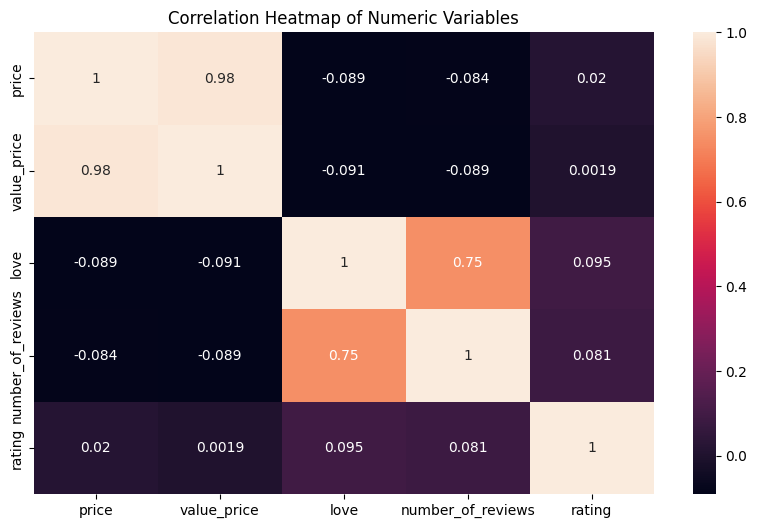

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


> price and value_price are highly correlated (0.98), suggesting redundancy. love and number_of_reviews also show a moderate positive correlation (0.75), indicating a potential relationship between these features.





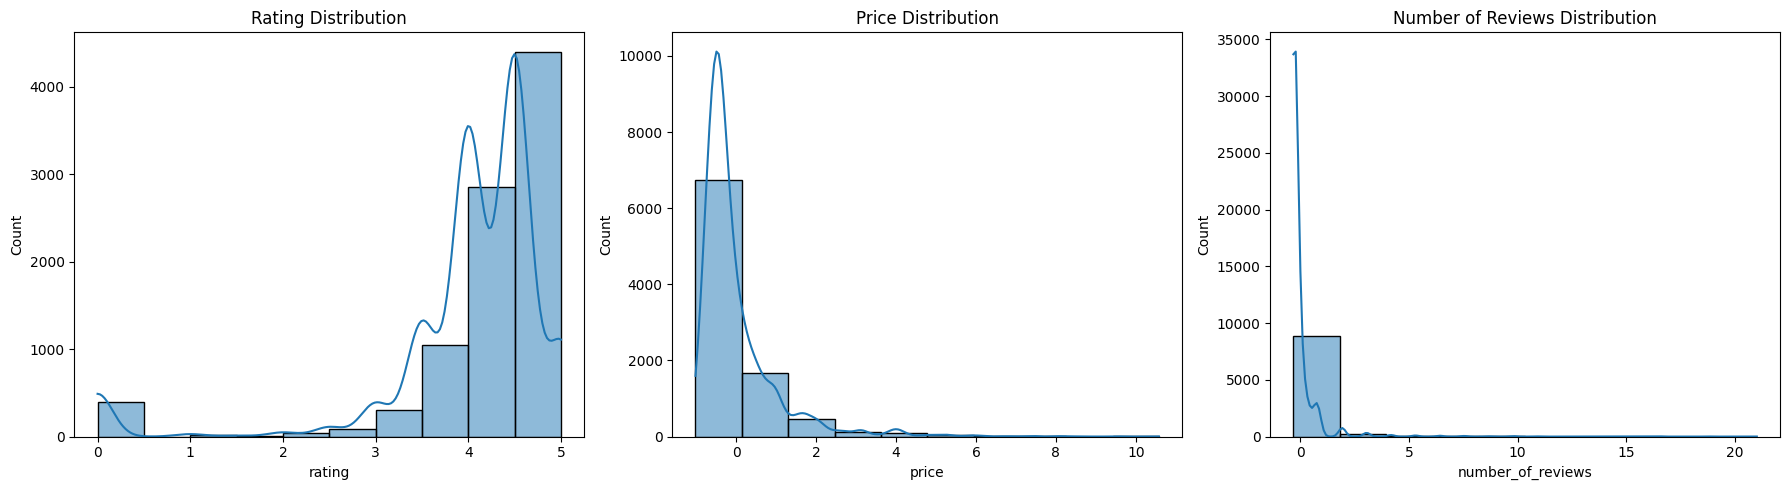

In [ ]:
# Distribution plots for key columns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['rating'], bins=10, kde=True, ax=axs[0]).set(title='Rating Distribution')
sns.histplot(data['price'], bins=10, kde=True, ax=axs[1]).set(title='Price Distribution')
sns.histplot(data['number_of_reviews'], bins=10, kde=True, ax=axs[2]).set(title='Number of Reviews Distribution')
plt.tight_layout()
plt.show()

* Rating: Ratings are mostly positive, centered around higher values, with a skew towards the upper end.
* Price: Prices are heavily skewed towards the lower end, with most products being affordable.
* Number of Reviews: The number of reviews is also skewed, with most products having few reviews and a small number having a significantly high count.

### Categorical Data Analysis

Text(0.5, 1.0, 'Top 10 Category')

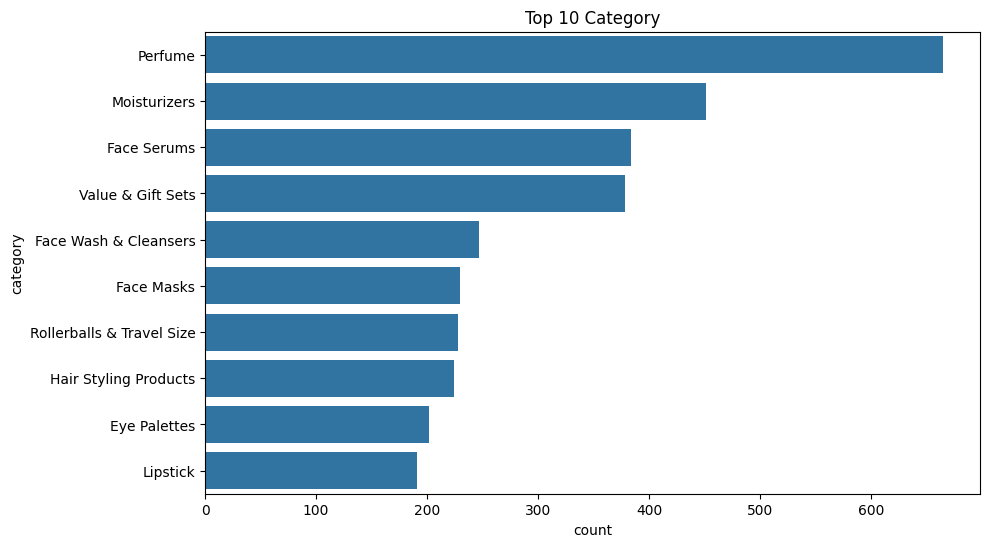

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().nlargest(10).index)
plt.title('Top 10 Category')

Text(0.5, 1.0, 'Top 10 Brands')

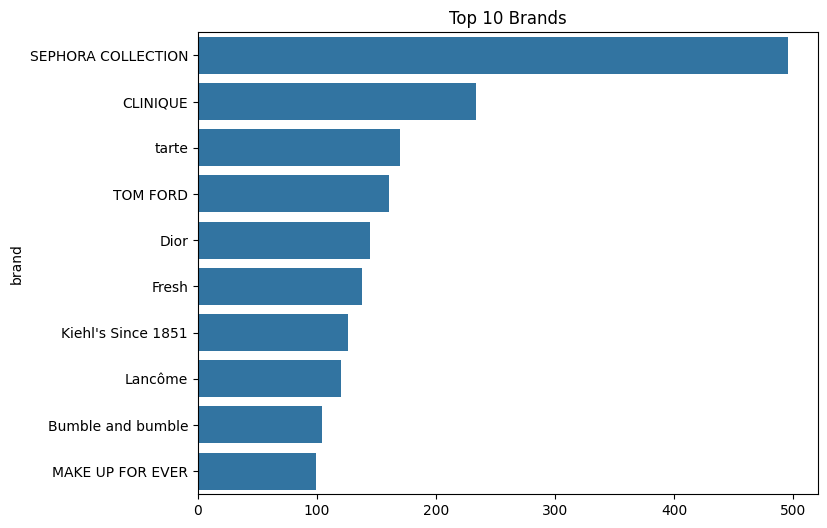

In [ ]:
top_brands = data['brand'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_brands.index, x=top_brands.values)
plt.title('Top 10 Brands')

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Major Preprocessing and Dropping unnecessary columns and handling categorical features, feature expansion

In [ ]:
data_filtered = data.drop(columns=['id', 'name', 'details', 'how_to_use', 'ingredients', 'options', 'MarketingFlags_content'])

# Splitting the features and target variable
X = data_filtered.drop(columns=['price', 'value_price','URL'])
y = data_filtered['price']

# Identifying categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['brand', 'category', 'size']
Numerical features: ['rating', 'number_of_reviews', 'love', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer']


In [ ]:
# Scale numerical features
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Define the polynomial degree
degree = 2

# Numerical preprocessing with scaling and polynomial features
numerical_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('poly', PolynomialFeatures(degree=degree, include_bias=False))  # Add polynomial features
])

# Preprocessing for categorical features
categorical_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_features),  # Use updated numerical preprocessor
        ('cat', categorical_preprocessor, categorical_features)
    ]
)

# Train first model

In [ ]:
print("Features used for prediction:")
print(X.columns.tolist())

Features used for prediction:
['brand', 'category', 'size', 'rating', 'number_of_reviews', 'love', 'MarketingFlags', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer']


In [ ]:
# Using Linear Regression as the first model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Showing data after preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print("X_train after preprocessing:")
print(pd.DataFrame(X_train_preprocessed).head())

X_train after preprocessing:
                                                   0
0    (0, 0)\t0.0068189344250608455\n  (0, 1)\t-0....
1    (0, 0)\t-3.9543743387153563\n  (0, 1)\t-0.32...
2    (0, 0)\t-1.9737777021451477\n  (0, 1)\t-0.32...
3    (0, 0)\t0.501968093567613\n  (0, 1)\t-0.2216...
4    (0, 0)\t0.501968093567613\n  (0, 1)\t-0.2936...


In [ ]:
# Fitting the model
model_pipeline.fit(X_train, y_train)

# Evaluate model and compare training vs. test error
# Making predictions
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

In [ ]:
# Showing predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nComparison of Actual vs Predicted Prices:")
print(results.head(10))


Comparison of Actual vs Predicted Prices:
        Actual  Predicted
1501  0.062269   0.199543
4708  2.755091   2.420857
7859  3.073141   1.896410
4347 -0.383001  -0.503026
2420  0.380319   1.337599
3395  2.225008   1.622903
3026  0.253099  -0.122315
8270  4.027291   2.463186
8860  0.253099   0.416974
5845 -0.785864  -0.510787


In [ ]:
# Evaluating the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Outputting the evaluation results
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Training MSE: 0.2962276130521577
Test MSE: 0.36603161585839494
Training R^2 Score: 0.7057149267842606
Test R^2 Score: 0.6240016160851134


In [ ]:
# Cross-validation for robustness
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mean_mse = -cv_scores.mean()
cv_std_mse = cv_scores.std()
print("\nCross-Validation MSE (Mean):", cv_mean_mse)
print("Cross-Validation MSE (Standard Deviation):", cv_std_mse)


Cross-Validation MSE (Mean): 0.6686685476420623
Cross-Validation MSE (Standard Deviation): 0.1543842684818222


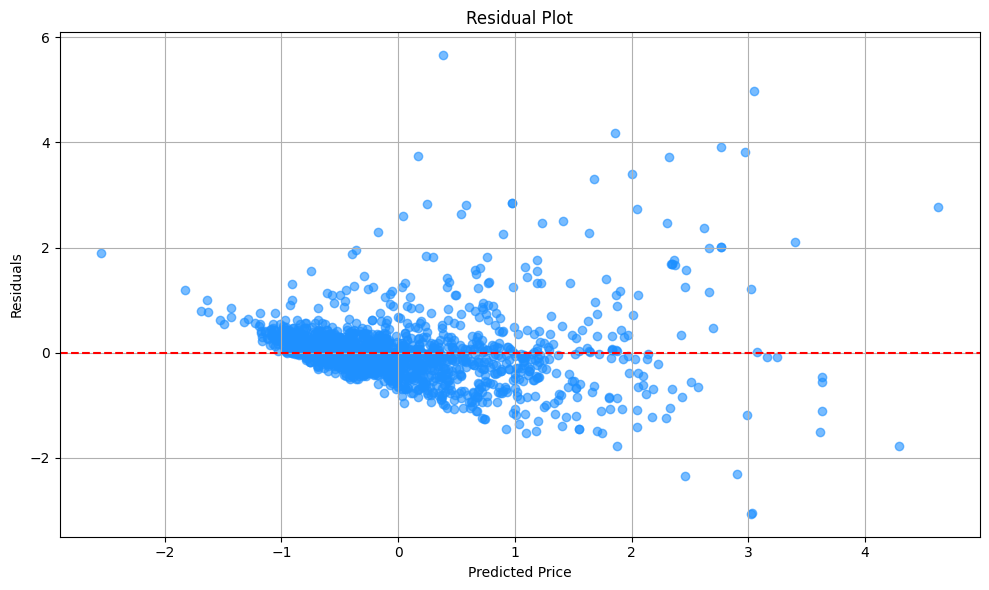

In [ ]:
# Draw the linear regression model graph
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='dodgerblue', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()



> The residual plot shows the difference between the actual values and the predicted values of our model. The residuals are scattered around the horizontal line at zero, which indicates that the errors have a roughly constant variance. However, the fan shape of the scatter indicates some heteroscedasticity, suggesting that our model may not perfectly fit the data, particularly as predicted values increase.



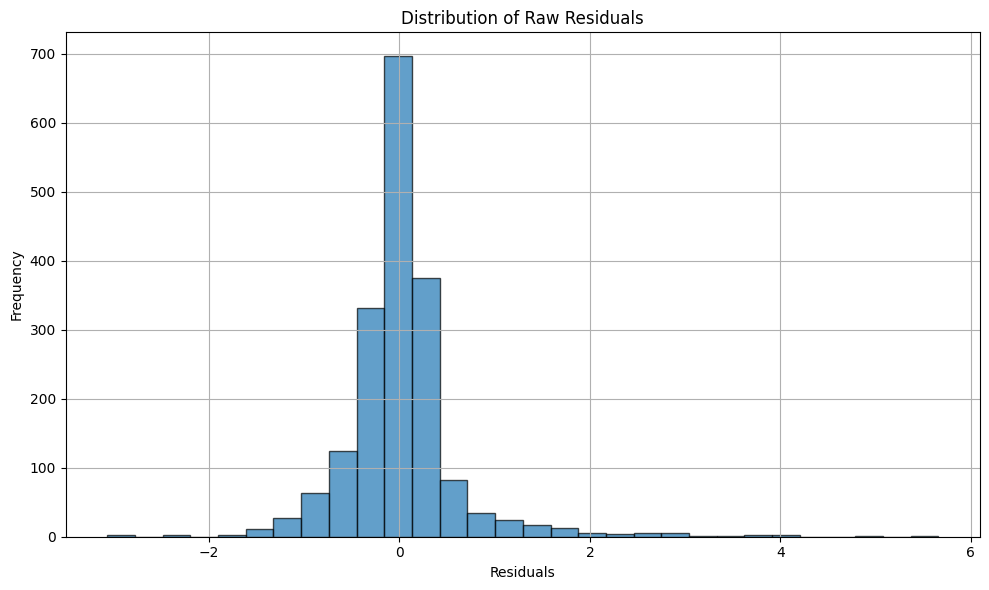

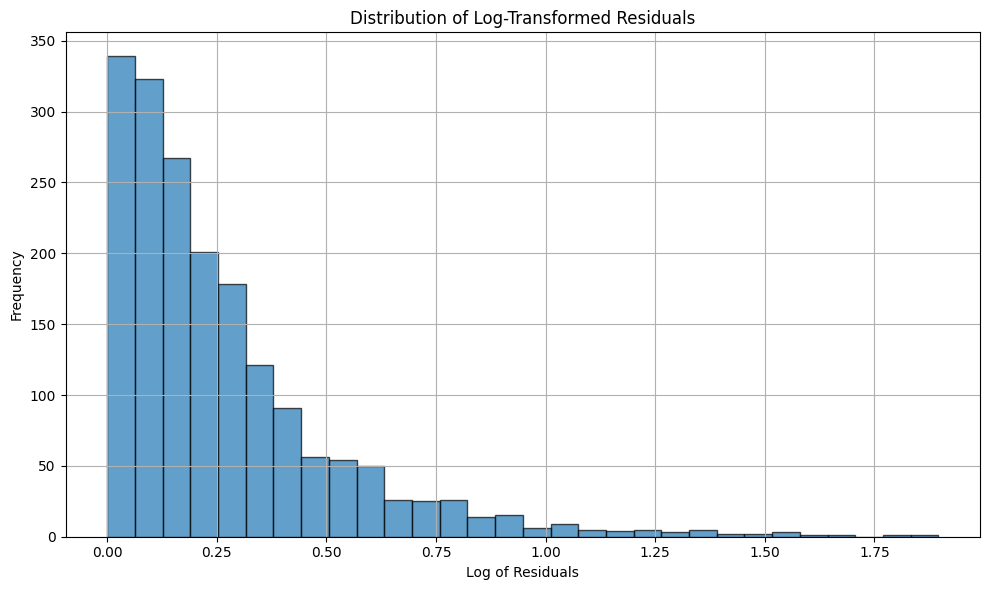

In [ ]:
# Update the log-transformed residual, to detect skewness

# Calculate residuals
residuals = y_test - y_test_pred

# Apply logarithmic transformation
log_residuals = np.log1p(np.abs(residuals))  # Use log(1 + |residual|)

# Plot raw residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Raw Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot log-transformed residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(log_residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Log of Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


> This histogram shows the frequency distribution of the residuals. The residuals appear to be centered around zero, which indicates that the model's predictions are unbiased on average. However, the spread and slight skewness of the residuals hint at potential issues with the model's assumptions about error distribution.

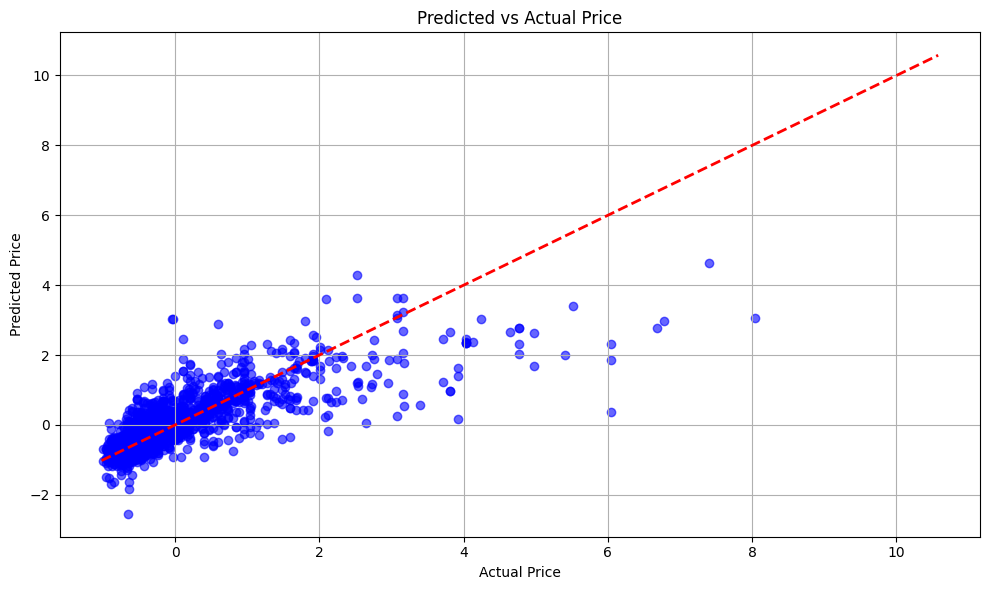

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.grid(True)
plt.tight_layout()
plt.show()

> This scatter plot compares the predicted prices to the actual prices. The red dashed line represents a perfect prediction (where predicted values would exactly match actual values). The spread around the line indicates the error in predictions, and it is clear that our model performs well for lower actual prices but has higher error for larger prices, as points deviate more from the line at higher values.

# Question:

Where does your model fit in the fitting graph?


Based on the residual plots and the predicted vs. actual plot, it appears that our model is in the middle range between underfitting and overfitting. The model shows reasonable performance in capturing the trend of the data, as indicated by the relatively low variance of residuals and the reasonable clustering around the line in the predicted vs. actual plot.

However, the scatter of residuals and the deviation of data points from the red dashed line at higher prices indicate that our model may be over-simplifying the relationships between features and the target variable. This suggests that while the model is not underfitting, it may not be capturing all the complex patterns in the data.

What are the next models you are thinking of and why?

* Polynomial Regression: Considering the non-linear pattern observed in the residual plot, incorporating a polynomial regression model may help capture more complex relationships between the features and the target variable.
* Tree-based Models (Decision Tree): Since our current model might be missing non-linear relationships, using a tree-based model can provide better performance in capturing complex patterns without making strong parametric assumptions.
* Support Vector Machines (SVMs): For a more refined approach, SVMs with different kernel functions could also be explored. Like price and satisfied is non-linear and complex, an SVM with an RBF kernel could be a good choice. This would allow the model to draw non-linear boundaries in the feature space to better classify satisfied outcomes.

###Conclusion
Our Multiple Linear Regression model captured a good portion of variance in the training data but struggled to generalize, indicating overfitting. The training R² score (0.7041) was significantly higher than the test R² score (0.6205), and the test MSE (0.3695) was noticeably larger than the training MSE (0.2978). While residuals were close to normal, there were slight patterns, and the predicted vs. actual plot showed deviations, suggesting that our model was not fully capturing the data’s complexity. In order to improve the predictive accuracy, we plan to try to implement regularization, such as Ridge or Lasso Regression to control overfitting by reducing large coefficients; explore non-linear models to capture more complex relationships; cap or remove extreme values to avoid skewing results.

# Train the second Model (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Decision Tree
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# Define hyperparameters to tune
param_grid = {
    'model__max_depth': [3, 5, 7, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}


## Hyperparameter Tunning

In [ ]:
# Perform hyperparameter tuning with GridSearchCV
dt_grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
dt_grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = dt_grid_search.best_estimator_

y_test_pred = best_dt_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Best Parameters:", dt_grid_search.best_params_)
print("Test MSE:", test_mse)
print("Test R^2 Score:", test_r2)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.1s
[CV] END model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.1s
[CV] END mo

In [ ]:
# Evaluate the model on training data
y_train_pred = best_dt_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training MSE:", train_mse)
print("Training R^2 Score:", train_r2)

Training MSE: 0.17340743783762724
Training R^2 Score: 0.8277296973958512


## Visualization

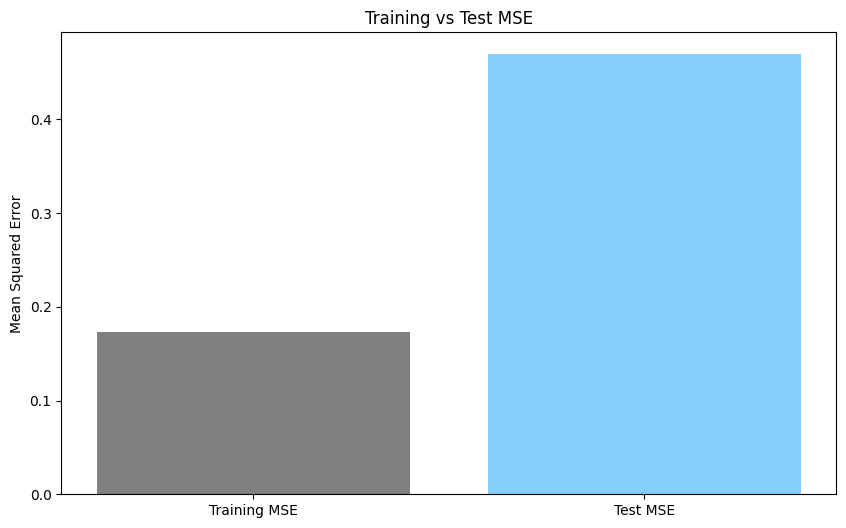

In [ ]:
# Plotting Training vs Test MSE
plt.figure(figsize=(10, 6))
plt.bar(['Training MSE', 'Test MSE'], [train_mse, test_mse], color=['grey', 'lightskyblue'])
plt.ylabel('Mean Squared Error')
plt.title('Training vs Test MSE')
plt.show()

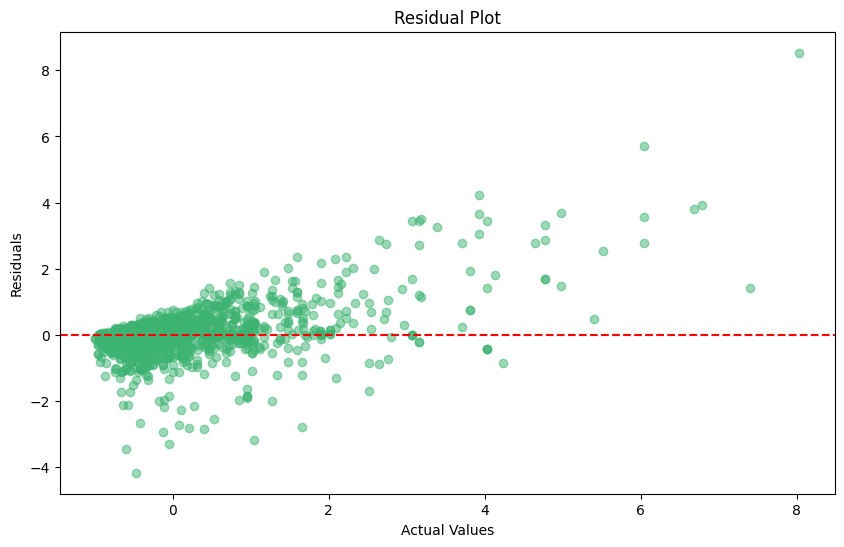

In [ ]:
# Plotting Residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5,color='mediumseagreen')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

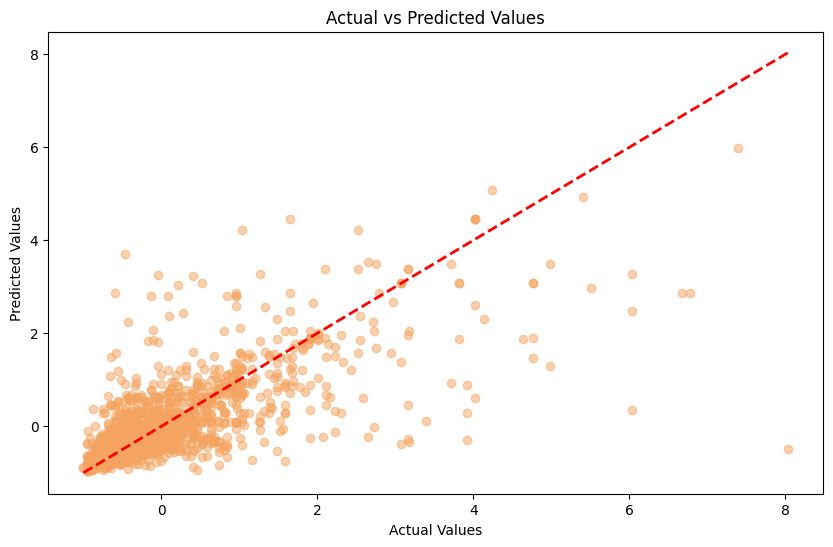

In [ ]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='sandybrown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
